# 显示股票基本信息

In [1]:
import sys
sys.path.insert(0, '../qtrader/qtrader')

import pandas as pd
import numpy as np
import tushare as ts
from AData import SHSZData, SHSZSelection
import analysis
#import draw

DATA_FOLRDER = '../data/SHSZ'

CODE='300104'

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
datamanager = SHSZData(DATA_FOLRDER)
equity = datamanager.get_basic(CODE)

## 1. 获取基本ochlv数据

In [3]:
df = datamanager.get_d(CODE)

def c_date(x):
    return [pd.datetime.strptime(str(i), '%Y-%m-%d') for i in x]
df[['date']] = df[['date']].apply(c_date)
df = df.set_index('date')

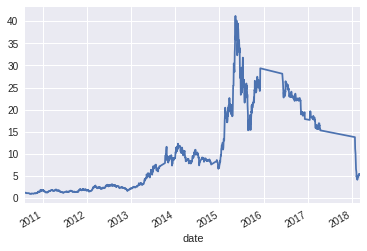

In [4]:
df.close.plot()

## 2. 获得每日涨跌幅统计

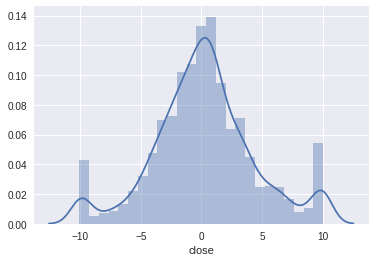

In [5]:
df['changeRatio'] = analysis.getChangeRatio(df, draw=True)

## 3. 获取每日振幅统计

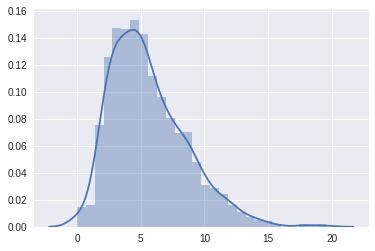

In [6]:
df['amplitude'] = analysis.getAmplitude(df, draw=True)

## 4. 获取跳空缺口
跳空缺口：

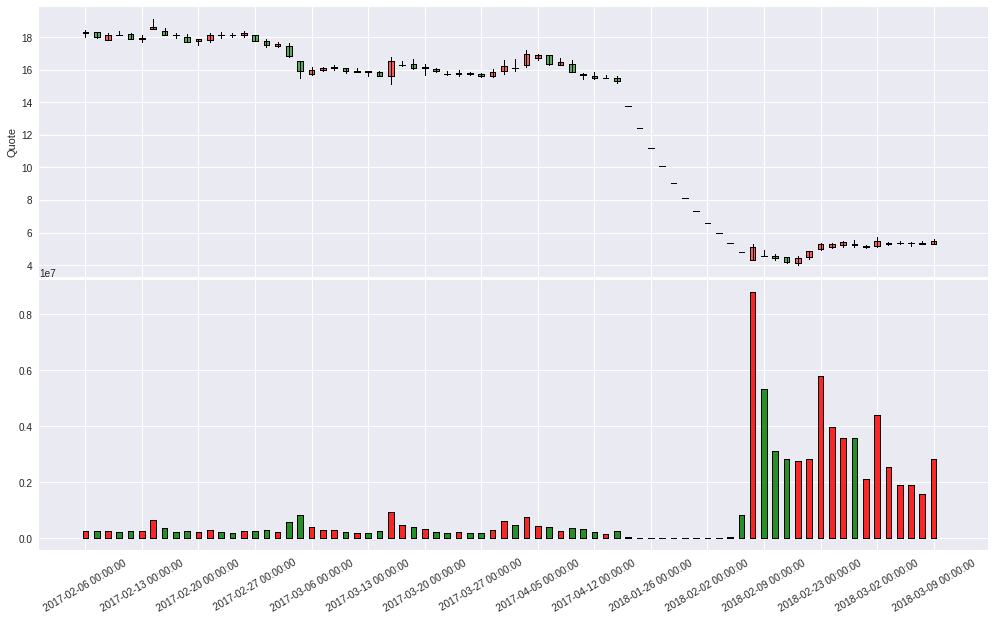

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
x = df.loc['2017-02-05':]
x['dump_power'] = analysis.getJumpPower(x, draw=True)


## 5.

In [8]:
def candlestick_vol2(quotes):
    #sma_10 = quotes.close.resample('10D').mean()
    #sma_30 = quotes.close.resample('30D').mean()
    SCALE = 10
    fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(17, 10))

    candlestick2_ochl(ax, quotes['open'], quotes['close'], quotes['high'], quotes['low'], 
                      width=0.5, colorup='r', colordown='g', alpha=0.6)
    ax.set_xticks(range(0, len(quotes.index), SCALE))
    ax.set_ylabel('quote')
    ax.grid(True)

    volume_overlay(ax2, quotes['open'], quotes['close'], quotes['volume'], 
                   colorup='r', colordown='g', width=0.5, alpha=0.6)
    # ax2.add_collection(bc)
    ax2.set_xticks(range(0, len(quotes.index), SCALE))
    ax2.set_xticklabels(quotes.index[::SCALE], rotation=30)
    ax2.grid(True)
    plt.subplots_adjust(hspace=0.01)
    plt.show()
candlestick_vol2(x)

NameError: name 'plt' is not defined